In [1]:
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *

from matplotlib import rc
import matplotlib.pylab as plt

#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)

from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

%load_ext autoreload
%autoreload 2

/n/home00/lee.5922/.local/lib/python2.7/site-packages/subprocess32.py:472: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


In [6]:
def calling_cmasscov(filename):
    cov_data = np.genfromtxt(filename)
    cov = np.zeros((112,112))
    for i in range(cov_data.shape[0]):
        ind1, ind2, co = cov_data[i,:]
        cov[int(ind1)-1][int(ind2)-1] = co
    return cov

In [20]:
#Ibanez covariance matrix
filename = '../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_covariance_matrix_from_mocks.dat'
cov = calling_cmasscov(filename)
cov_cmass0 = cov[28:28+28,28:28+28]
cov_cmass02 = cov[28:28+28, -28:]
cov_cmass20 = cov[-28: ,28:28+28]
cov_cmass2 = cov[-28:,-28:]

cov_cmass = np.vstack(( np.hstack((cov_cmass0, cov_cmass02 )), np.hstack((cov_cmass20, cov_cmass2 )) ))
np.savetxt('../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_covariance_matrix.dat', cov_cmass)
np.savetxt('../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_fisher_matrix.dat', np.linalg.inv(cov_cmass))
np.savetxt('../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_CMASSDR12_monopole_fisher_matrix.dat', np.linalg.inv(cov_cmass0))


In [8]:
datav = np.genfromtxt('../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_monopole_z43z75.dat')

In [19]:
mask = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_ibanez_xionly_b.mask')
datavector = np.zeros(mask.size)

measured = np.genfromtxt('data_txt/cfz_multipole_comparison_random.txt')[:,1]
datavector[1500:1500+28] = measured
np.savetxt('../../bandpower/SNR/data_txt/datav/cmass_sgc_ngc_random.datavector', datavector)

measured = np.genfromtxt('data_txt/cfz_multipole_comparison_random_zcut.txt')[:,1]
datavector[1500:1500+28] = measured
np.savetxt('../../bandpower/SNR/data_txt/datav/cmass_sgc_ngc_random_zcut.datavector', datavector)

measured0 = np.genfromtxt('data_txt/cfz_multipole_comparison_random.txt')[:,1]
measured2 = np.genfromtxt('data_txt/cfz_multipole_comparison_random.txt')[:,2]
measured = np.hstack((measured0, measured2)) 
datavector[1500:1500+28+28] = measured
np.savetxt('../../bandpower/SNR/data_txt/datav/cmass_sgc_ngc_random_02.datavector', datavector)


measured0 = np.genfromtxt('data_txt/cfz_multipole_comparison_random_zcut.txt')[:,1]
measured2 = np.genfromtxt('data_txt/cfz_multipole_comparison_random_zcut.txt')[:,2]
measured = np.hstack((measured0, measured2)) 

datavector[1500:1500+28+28] = measured
np.savetxt('../../bandpower/SNR/data_txt/datav/cmass_sgc_ngc_random_zcut_02.datavector', datavector)

28

In [47]:
datav[:,0]

array([   7.5,   12.5,   17.5,   22.5,   27.5,   32.5,   37.5,   42.5,
         47.5,   52.5,   57.5,   62.5,   67.5,   72.5,   77.5,   82.5,
         87.5,   92.5,   97.5,  102.5,  107.5,  112.5,  117.5,  122.5,
        127.5,  132.5,  137.5,  142.5,  147.5,  152.5,  157.5,  162.5,
        167.5,  172.5,  177.5,  182.5,  187.5,  192.5,  197.5])

In [72]:
rbin, rstep = np.linspace(5, 200, 40 , retstep=True)

In [75]:
rcenter = rbin[:-1]+rstep*0.5
print rcenter[7:-4]

[  42.5   47.5   52.5   57.5   62.5   67.5   72.5   77.5   82.5   87.5
   92.5   97.5  102.5  107.5  112.5  117.5  122.5  127.5  132.5  137.5
  142.5  147.5  152.5  157.5  162.5  167.5  172.5  177.5]


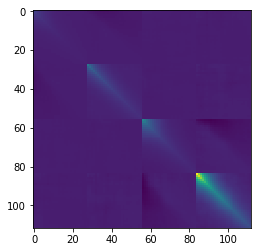

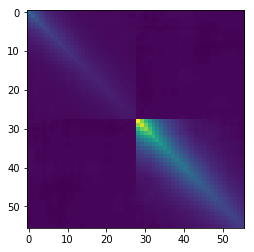

In [41]:
fig, ax = plt.subplots()
ax.imshow(cmasscov)

fig, ax = plt.subplots()
ax.imshow(cov_cmass)

In [166]:
theoretical_datav[mask][-29:]

array([ 0.03434516, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ])

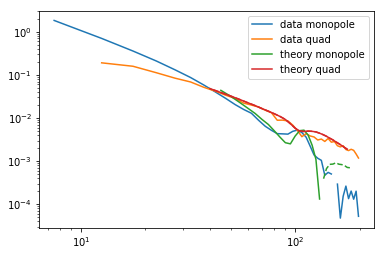

In [198]:
datav0 = np.genfromtxt('../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_monopole_z43z75.dat')
datav2 = np.genfromtxt('../../bandpower/SNR/data_txt/cov/Pellejero-Ibanez/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_quadrupole_z43z75.dat')

theoretical_datav = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_ibanez_xionly_bf_02.datavector')
mask = np.genfromtxt('../../bandpower/SNR/data_txt/datav/mcmc_ibanez_xionly_b.mask')
mask = np.array([bool(m) for m in mask ])

rcenter = np.linspace(40, 180, 29)

fig, ax = plt.subplots()
ax.loglog(datav0[:,0], datav0[:,1], label = 'data monopole')
ax.loglog(datav2[:,0], -1 * datav2[:,1], label = 'data quad')
ax.loglog(rcenter[::-1], theoretical_datav[mask][:29], label='theory monopole')
ax.loglog(rcenter[::-1], -1* theoretical_datav[mask][:29], color=ax.lines[-1].get_color() , linestyle='--')
ax.loglog(rcenter[::-1], -1 * theoretical_datav[mask][-29:], label='theory quad')
ax.loglog(rcenter[::-1], -1* theoretical_datav[mask][-29:], color=ax.lines[-1].get_color() , linestyle='--')
ax.legend()

In [171]:
mask.size

1584

In [194]:
datavector = np.zeros(mask.size)
datavector[1500:1500+28] = datav0[:,1][7:-4]
datavector[1500+28:1500+28+28] = datav2[:,1][7:-4]
np.savetxt('../../bandpower/SNR/data_txt/datav/Pellejero-Ibanez_2016_LOWZDR12_CMASSDR12_correlation_function_z43z75.datavector',
           datavector)

In [202]:
np.logspace(np.log10(40), np.log10(180), 100)

array([  40.        ,   40.61234787,   41.23406999,   41.86530986,
         42.50621319,   43.15692792,   43.81760424,   44.48839466,
         45.169454  ,   45.86093947,   46.56301069,   47.2758297 ,
         47.99956104,   48.73437176,   49.48043148,   50.2379124 ,
         51.00698937,   51.7878399 ,   52.58064424,   53.38558537,
         54.20284911,   55.03262409,   55.87510184,   56.73047683,
         57.5989465 ,   58.4807113 ,   59.37597478,   60.28494357,
         61.20782749,   62.14483956,   63.09619606,   64.06211659,
         65.04282411,   66.03854498,   67.04950904,   68.07594964,
         69.11810371,   70.17621179,   71.25051814,   72.34127071,
         73.44872129,   74.57312549,   75.71474285,   76.87383689,
         78.05067515,   79.24552926,   80.45867504,   81.6903925 ,
         82.94096594,   84.21068404,   85.49983986,   86.80873098,
         88.13765952,   89.48693222,   90.85686053,   92.24776065,
         93.65995365,   95.09376548,   96.54952709,   98.02757

In [224]:
filename = '/n/des/lee.5922/programs/cosmolike/MG_musigma/cov/cov_cmass_wtheta_only'
def calling_cmasscov(filename):
    cov_data = np.genfromtxt(filename)
    cov = np.zeros((79,79))
    for i in range(cov_data.shape[0]):
        ind1, ind2, _,_,_,_,_,_, co,_ = cov_data[i,:]
        cov[int(ind1)-1][int(ind2)-1] = co
    return cov

cov = calling_cmasscov(filename)
#np.savetxt(filename, cov[-20:,-20:])

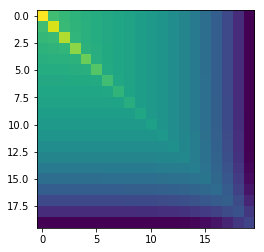

In [223]:
fig, ax = plt.subplots()
ax.imshow(np.log10(cov[-20:,-20:]) )

In [225]:
cov[-20:,-20:].shape

(20, 20)